In [1]:
import numpy as np
import argparse
import cv2
import skimage.io
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from skimage import img_as_ubyte, exposure

In [2]:
%pwd

'/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/code/imagePreProcessing'

In [3]:
%cd /Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/onlyDapiYFP/scan2_WellA2/Subregion_1_r1_c1

/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/onlyDapiYFP/scan2_WellA2/Subregion_1_r1_c1


In [4]:
dapi = skimage.io.imread('R4_DAPI.tif')

In [5]:
#Mac
%cd /Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/onlyDapiYFP/scan2_WellA2

/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/onlyDapiYFP/scan2_WellA2


In [43]:
#Macbook
%cd /Users/jones/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/onlyDapiYFP/scan2_WellA2

/Users/jones/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/scan1_WellA1


In [6]:
mypath = os.getcwd()

In [7]:
folders = [x[0] for x in os.walk(mypath)]
folders = sorted(folders)

In [9]:
image_output = 'mergedDAPIYFPNormalized_'
zeros = np.zeros(dapi.shape[:2], dtype="uint8")
endpath = '/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/mergedDapiYFP/scan2_WellA2'
for i in range(len(folders)):
	if i != 0:
		os.chdir(folders[i])
		foldername = os.path.basename(folders[i])
		dapi = skimage.io.imread('R4_DAPI.tif')
		yfp = skimage.io.imread('R4_YFP.tif')
		value = np.quantile(yfp, 0.99)
		yfp[yfp > value] = value
		DAPI_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(dapi))
		YFP_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(yfp))
		merged8_NormalizeScikit = cv2.merge([zeros, YFP_8bit_NormalizeScikit, DAPI_8bit_NormalizeScikit])
		im = Image.fromarray(merged8_NormalizeScikit)
		filename = image_output + foldername + '.tif'
		im.save(join(endpath,filename))
	os.chdir(folders[0])

In [48]:
dapi = skimage.io.imread('R4_DAPI.tif')
yfp = skimage.io.imread('R4_YFP.tif')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jones/Library/CloudStorage/OneDrive-NorthwesternUniversity/ownProject/data/rawData/clampFISCHIan/E159part2/scan1_WellA1/R4_DAPI.tif'

In [36]:
value = np.quantile(yfp, 0.95)

In [37]:
yfp[yfp > value] = value

In [38]:
DAPI_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(dapi))
YFP_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(yfp))

In [39]:
zeros = np.zeros(dapi.shape[:2], dtype="uint8")
image_output = 'mergedDAPIYFP_normalizedNew095.tif'
merged8_NormalizeScikit = cv2.merge([zeros, YFP_8bit_NormalizeScikit, DAPI_8bit_NormalizeScikit])

In [40]:
im = Image.fromarray(merged8_NormalizeScikit)
filename = image_output
im.save(filename)

In [ ]:
plt.imshow(dapi, cmap = 'gray')

In [ ]:
plt.imshow(dapi, cmap = 'gray')

In [ ]:
print(yfp.shape)
print(dapi.shape)

In [14]:
print(yfp.shape)
print(dapi.shape)

(7187, 7146)
(7187, 7146)


In [15]:
print(yfp.min(), yfp.max())
print(dapi.min(), dapi.max())

142 33226
22 20583


(array([[6491.,  253.,  193., ...,    0.,    0.,    0.],
        [6489.,  256.,  198., ...,    0.,    0.,    0.],
        [6493.,  249.,  197., ...,    0.,    0.,    0.],
        ...,
        [6887.,   90.,   94., ...,    0.,    0.,    0.],
        [6888.,   87.,   98., ...,    0.,    0.,    0.],
        [6892.,   82.,  100., ...,    0.,    0.,    0.]]),
 array([   22. ,  2078.1,  4134.2,  6190.3,  8246.4, 10302.5, 12358.6,
        14414.7, 16470.8, 18526.9, 20583. ]),
 <a list of 7146 BarContainer objects>)

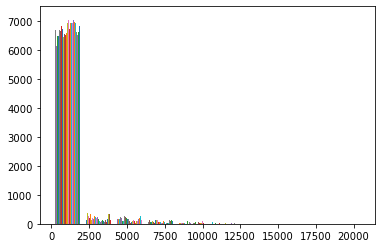

In [9]:
plt.hist(dapi)

In [13]:
np.quantile(dapi, 0.99)

7304.0

(array([[5761.,  723.,  492., ...,    0.,    0.,    0.],
        [5759.,  725.,  488., ...,    0.,    0.,    0.],
        [5752.,  751.,  478., ...,    0.,    0.,    0.],
        ...,
        [6539.,  372.,  212., ...,    0.,    0.,    0.],
        [6530.,  385.,  204., ...,    0.,    0.,    0.],
        [6526.,  390.,  201., ...,    0.,    0.,    0.]]),
 array([ 142. ,  700.3, 1258.6, 1816.9, 2375.2, 2933.5, 3491.8, 4050.1,
        4608.4, 5166.7, 5725. ]),
 <a list of 7146 BarContainer objects>)

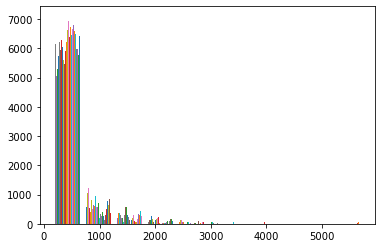

In [20]:
plt.hist(yfp)

In [11]:
np.quantile(yfp, 0.999)

3415.0

In [14]:
dapi_flatten = dapi.flatten()
yfp_flatten = yfp.flatten()

{'whiskers': [<matplotlib.lines.Line2D at 0x307aec460>,
 'caps': [<matplotlib.lines.Line2D at 0x307aecac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x307adb910>],
 'medians': [<matplotlib.lines.Line2D at 0x307aecfa0>],
 'fliers': [],
 'means': []}

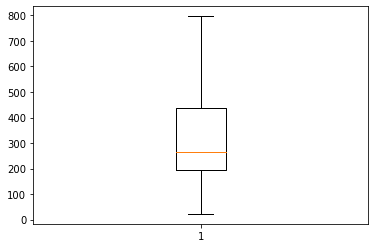

In [15]:
plt.boxplot(dapi_flatten, showfliers = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x306ce16d0>,
 'caps': [<matplotlib.lines.Line2D at 0x306ce1c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x306ce11c0>],
 'medians': [<matplotlib.lines.Line2D at 0x306cef250>],
 'fliers': [],
 'means': []}

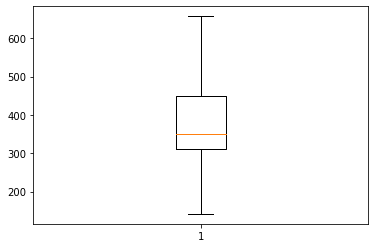

In [16]:
plt.boxplot(yfp_flatten, showfliers = False)

In [19]:
#normalization
#scikit image
DAPI_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(dapi))
YFP_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(yfp))

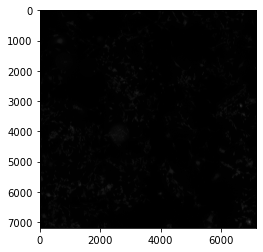

In [22]:
plt.imshow(YFP_8bit_NormalizeScikit, cmap = 'gray')

In [24]:
zeros = np.zeros(dapi.shape[:2], dtype="uint8")
merged8_NormalizeScikit = cv2.merge([zeros, YFP_8bit_NormalizeScikit, DAPI_8bit_NormalizeScikit])

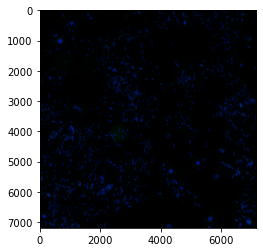

In [25]:
plt.imshow(merged8_NormalizeScikit)

In [26]:
im = Image.fromarray(merged8_NormalizeScikit)
im.save('YFP_DAPI_rgb8bitScikit.tif')

In [14]:
zeros = np.zeros(nuclei.shape[:2], dtype="uint16")
merged16 = cv2.merge([zeros, yfp, nuclei])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


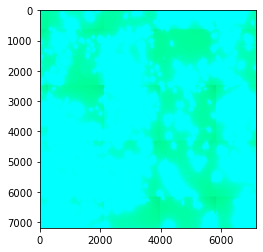

In [15]:
plt.imshow(merged16)

In [16]:
merged16.shape

(7187, 7146, 3)

In [43]:
merged16[:,:,2].max()

20583

In [ ]:
im.save(merged16Name)

In [18]:
# scale to 8bit and merge
import cv2
from skimage import img_as_ubyte, exposure

In [53]:
yfp.shape[:2]

(7187, 7146)

In [ ]:
##direct conversion

In [31]:
#scikit image
DAPI_8bit_noNormalizeScikit = img_as_ubyte(nuclei)
YFP_8bit_noNormalizeScikit = img_as_ubyte(yfp)
#cv2
DAPI_8bit_noNormalizeCV2 = cv2.convertScaleAbs(nuclei)
YFP_8bit_noNormalizeCV2 = cv2.convertScaleAbs(yfp)

In [ ]:
#normalization

In [32]:
#scikit image
DAPI_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(nuclei))
YFP_8bit_NormalizeScikit = img_as_ubyte(exposure.rescale_intensity(yfp))
#cv2
DAPI_8bit_NormalizeCV2 = cv2.normalize(nuclei, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)
YFP_8bit_NormalizeCV2 = cv2.normalize(yfp, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

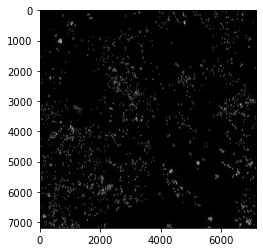

In [28]:
plt.imshow(DAPI_8bit_noNormalizeScikit, cmap = 'gray')

In [33]:
zeros = np.zeros(nuclei.shape[:2], dtype="uint8")
merged8_NormalizeScikit = cv2.merge([zeros, YFP_8bit_NormalizeScikit, DAPI_8bit_NormalizeScikit])
merged8_Normalizecv2 = cv2.merge([zeros, YFP_8bit_NormalizeCV2, DAPI_8bit_NormalizeCV2])
merged8_noNormalizeScikit = cv2.merge([zeros, YFP_8bit_noNormalizeScikit, DAPI_8bit_noNormalizeScikit])
merged8_noNormalizecv2 = cv2.merge([zeros, YFP_8bit_noNormalizeCV2, DAPI_8bit_noNormalizeCV2])

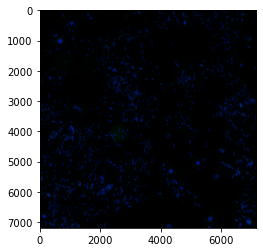

In [38]:
plt.imshow(merged8_NormalizeScikit)

In [43]:
%cd
%cd downloads

/Users/jbj7388
/Users/jbj7388/Downloads


In [44]:
im = Image.fromarray(merged8_NormalizeScikit)
im.save('rgb8bitScikit.tif')

In [45]:
im = Image.fromarray(merged8_Normalizecv2)
im.save('rgb8bitcv2.tif')

In [216]:
%cd /Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/sideProjects/lisaProject/data/channelMergedNuclei

/Users/jbj7388/Library/CloudStorage/OneDrive-NorthwesternUniversity/sideProjects/lisaProject/data/channelMergedNuclei


In [217]:
Channel1Name = image_output + '_channel1.tif'
im = Image.fromarray(mergedChannel1)
im.save(Channel1Name)

Channel2Name = image_output + '_channel2.tif'
im = Image.fromarray(mergedChannel2)
im.save(Channel2Name)

Channel3Name = image_output + '_channel3.tif'
im = Image.fromarray(mergedChannel3)
im.save(Channel3Name)

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
	help="path to the input image")
args = vars(ap.parse_args())

In [ ]:
test = [os.path.join(path, name) for path, subdirs, files in os.walk(mypath) for name in files]